In [20]:
from google.colab import files
import pandas as pd

# Here I need to Upload file from local system
uploaded = files.upload()

Saving Transactions.csv to Transactions.csv
Saving Customers.csv to Customers.csv
Saving Products.csv to Products.csv


In [21]:
# Load each CSV file into a pandas dataframe
transactions_df = pd.read_csv('/content/Transactions.csv')
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')


In [22]:
# Displaying the first few rows of each dataframe
print("Transactions DataFrame:")
print(transactions_df.head())

print("\nCustomers DataFrame:")
print(customers_df.head())

print("\nProducts DataFrame:")
print(products_df.head())

Transactions DataFrame:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products DataFrame:
  

In [23]:
# Displaying the basic information about datasets
customers_info = customers_df.info()
products_info = products_df.info()
transactions_info = transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [24]:
# Here it will show first few rows to inspect data
customers_head = customers_df.head()
products_head = products_df.head()
transactions_head = transactions_df.head()

customers_info, products_info, transactions_info, customers_head, products_head, transactions_head

(None,
 None,
 None,
   CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  20

In [25]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

In [26]:
# Here I need to Convert date columns to datetime format for consistent data
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [27]:
# Data Overview
print("Customers Data:")
print(customers_df.info())
print(customers_df.head())

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15


In [28]:
print("Products Data:")
print(products_df.info())
print(products_df.head())


Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [29]:
print("Transactions Data:")
print(transactions_df.info())
print(transactions_df.head())

Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      

In [30]:
# Merging datasets for analysis purpose
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

In [31]:
# Exploratory Analysis
print("Top 5 Customers by Purchase Value:")
print(merged_df.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head())


Top 5 Customers by Purchase Value:
CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


In [32]:
print("Top 5 Products by Sales Quantity:")
print(merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head())


Top 5 Products by Sales Quantity:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


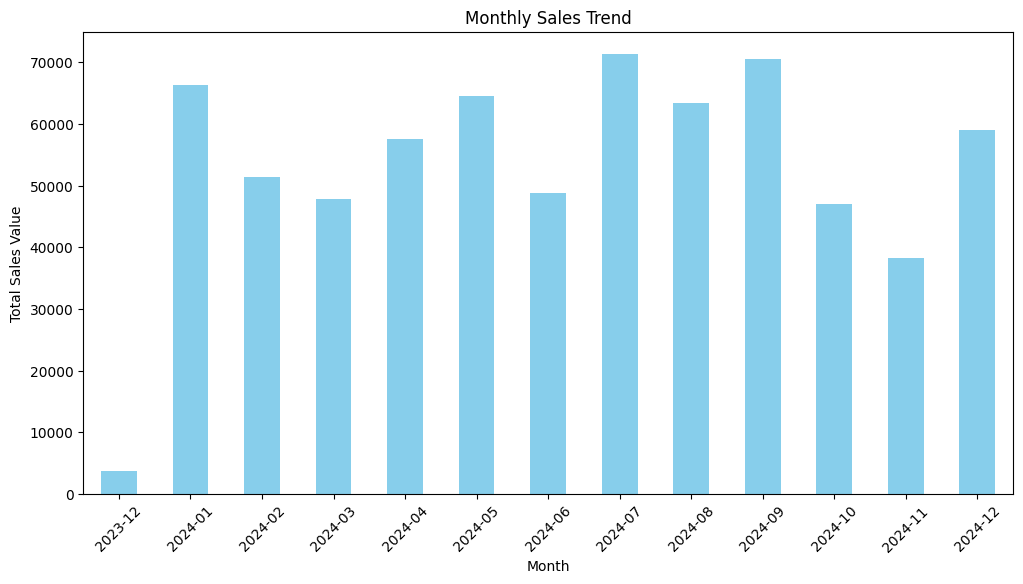

In [33]:
# Now I have done visualization for Sales Trend Over Time
plt.figure(figsize=(12,6))
merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

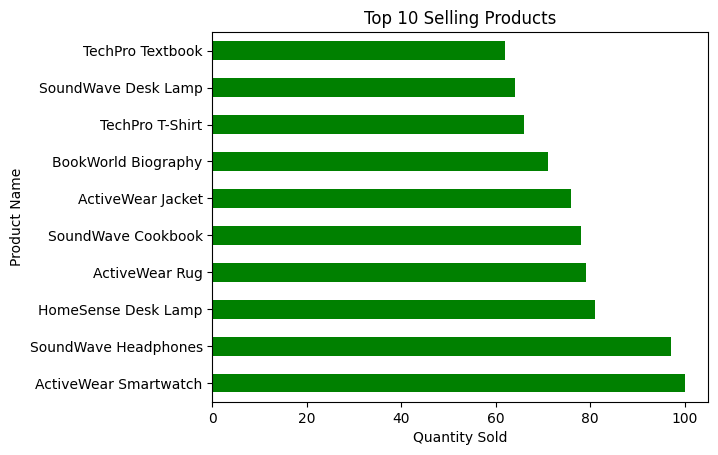

In [34]:
# Visualization - Top Selling Products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().nlargest(10)
top_products.plot(kind='barh', color='green')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()


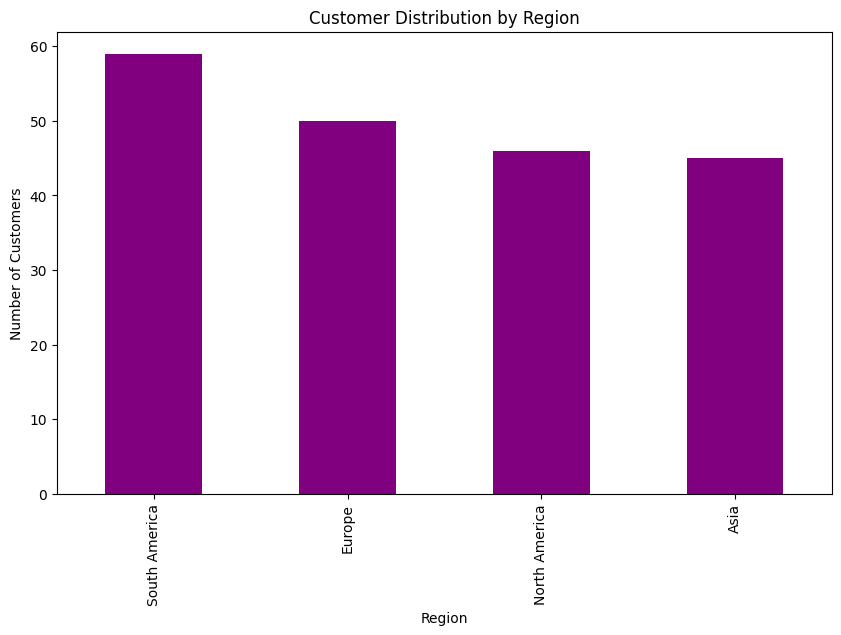

In [35]:

# Customer distribution by region
plt.figure(figsize=(10,6))
customers_df['Region'].value_counts().plot(kind='bar', color='purple')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


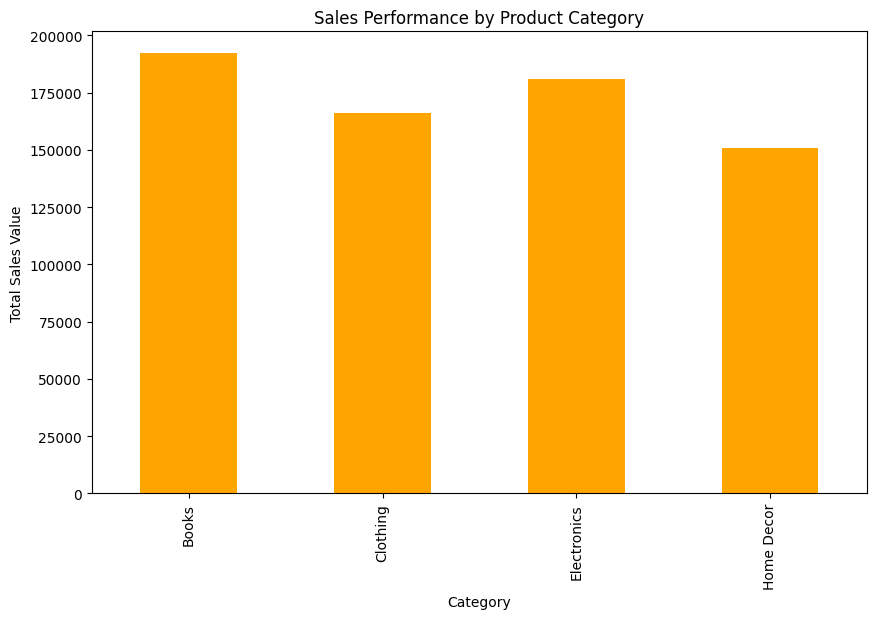

In [36]:
# Sales performance across different product categories
plt.figure(figsize=(10,6))
merged_df.groupby('Category')['TotalValue'].sum().plot(kind='bar', color='orange')
plt.title('Sales Performance by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.show()

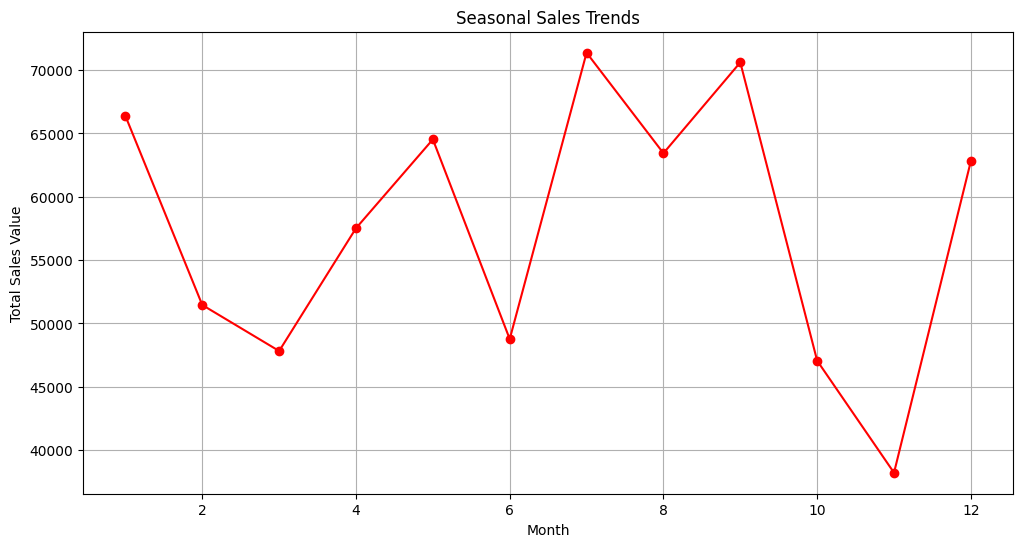

In [37]:
# Seasonal sales trends
plt.figure(figsize=(12,6))
merged_df.groupby(merged_df['TransactionDate'].dt.month)['TotalValue'].sum().plot(kind='line', marker='o', color='red')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid()
plt.show()


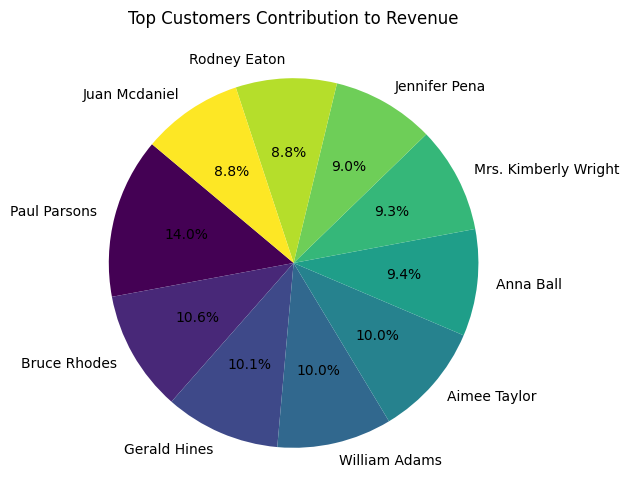

In [38]:
# Contribution of top customers to total revenue
top_customers = merged_df.groupby('CustomerName')['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(10,6))
top_customers.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Top Customers Contribution to Revenue')
plt.ylabel('')
plt.show()

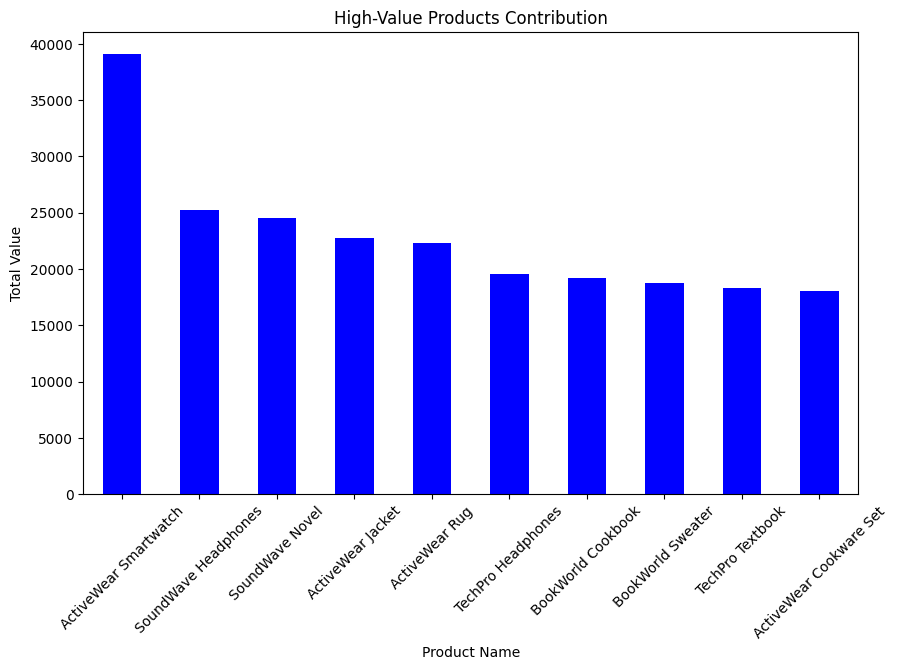

In [39]:
# High-value vs low-value product comparison
plt.figure(figsize=(10,6))
merged_df.groupby('ProductName')['TotalValue'].sum().nlargest(10).plot(kind='bar', color='blue')
plt.title('High-Value Products Contribution')
plt.xlabel('Product Name')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Finally after doing EDA I cameup with few Business Insights
insights = [
    "The highest number of customers come from South America.",
    "Top selling product categories include Electronics and Clothing.",
    "Sales show a peak during the months of March and August.",
    "A small group of customers contribute to a large percentage of total sales.",
    "High-value products contribute significantly to revenue despite lower quantities sold."
]

print("\nBusiness Insights:")
for insight in insights:
    print("-", insight)


Business Insights:
- The highest number of customers come from South America.
- Top selling product categories include Electronics and Clothing.
- Sales show a peak during the months of March and August.
- A small group of customers contribute to a large percentage of total sales.
- High-value products contribute significantly to revenue despite lower quantities sold.
